# Performance

In [1]:
%matplotlib inline

In [2]:
from scientisttseries.utils import *
import numpy as np
import statsmodels as smt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

## Linear regression

In [3]:
# Linear regression
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
lm_model = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()
# Coefficients
coefficients(lm_model)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,38.6517,9.456,4.087,0.000,19.826,57.478
Region[T.E],-15.4278,9.727,-1.586,0.117,-34.793,3.938
Region[T.N],-10.0170,9.260,-1.082,0.283,-28.453,8.419
Region[T.S],-4.5483,7.279,-0.625,0.534,-19.039,9.943
Region[T.W],-10.0913,7.196,-1.402,0.165,-24.418,4.235
Literacy,-0.1858,0.210,-0.886,0.378,-0.603,0.232
Wealth,0.4515,0.103,4.390,0.000,0.247,0.656


In [4]:
lm_model2 = smf.ols(formula='Lottery ~ Literacy + Region', data=df).fit()
coefficients(lm_model2)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,65.0216,8.104,8.023,0.000,48.891,81.152
Region[T.E],-6.5053,10.555,-0.616,0.539,-27.515,14.505
Region[T.N],-14.5009,10.213,-1.420,0.160,-34.829,5.827
Region[T.S],-3.3293,8.071,-0.413,0.681,-19.394,12.736
Region[T.W],-7.6858,7.962,-0.965,0.337,-23.533,8.162
Literacy,-0.3981,0.227,-1.757,0.083,-0.849,0.053


In [5]:
# Model performance
compare_performance([lm_model, lm_model2])

,Name,AIC,AICC,BIC,Log-Likelihood,R-squared,Adj. rsquared,RMSE,sigma
Model 1,ols,764.598558,766.053104,781.697117,-375.299279,0.337951,0.287024,400.492167,20.890997
Model 2,ols,781.365703,782.442626,796.021610,-384.682851,0.174384,0.122130,499.438336,23.181250


In [6]:
# Residuals
residuals(lm_model).head()

0    -8.306220
1     8.909644
2     2.224029
3    31.011729
4    31.125249
dtype: float64

## Logistic regression

In [7]:
# Logistic regression
spector_data = sm.datasets.spector.load_pandas()
spector_data.exog = sm.add_constant(spector_data.exog)
glm_model = sm.Logit(spector_data.endog, spector_data.exog).fit(disp=False)
# Coefficients
coefficients(glm_model)

,coef,std err,z,P>|z|,[0.025,0.975]
const,-13.0213,4.931,-2.641,0.008,-22.687,-3.356
GPA,2.8261,1.263,2.238,0.025,0.351,5.301
TUCE,0.0952,0.142,0.672,0.501,-0.182,0.373
PSI,2.3787,1.065,2.234,0.025,0.292,4.465


In [8]:
spector_data.exog = sm.add_constant(spector_data.exog)
spector_data.exog = spector_data.exog.drop("TUCE",axis=1)
glm_model2 = sm.Logit(spector_data.endog, spector_data.exog).fit(disp=False)
coefficients(glm_model2)

,coef,std err,z,P>|z|,[0.025,0.975]
const,-11.6016,4.213,-2.754,0.006,-19.859,-3.344
GPA,3.0634,1.223,2.505,0.012,0.667,5.460
PSI,2.3378,1.041,2.246,0.025,0.298,4.378


In [9]:
# Model performance
compare_performance(model =[glm_model,glm_model2])

,Name,AIC,AICC,BIC,Log-Likelihood,Pseudo R-squared,log loss
Model 1,logit,33.779268,35.26075,39.642212,-12.889634,0.374038,6.758185
Model 2,logit,32.253147,33.11029,36.650355,-13.126574,0.362532,6.758185


In [10]:
# Residuals
residuals(glm_model).head()

0   -0.026578
1   -0.059501
2   -0.187260
3   -0.025902
4    0.430107
dtype: float64

## Times series

In [11]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta = dta["SUNACTIVITY"]

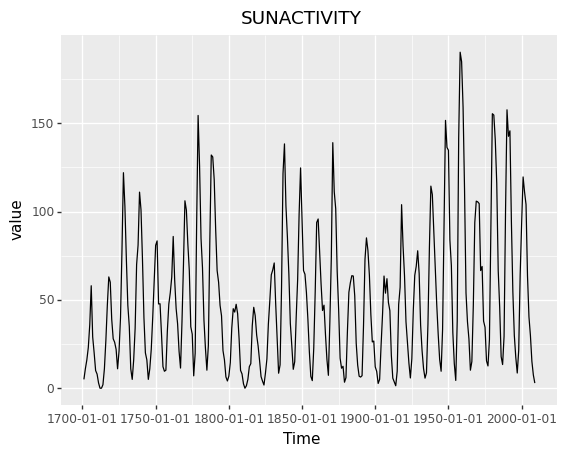

In [12]:
# Représentation graphique
import plotnine as pn
from scientisttseries.tsaplots import ggtsplot
p = ggtsplot(dta)
print(p)

In [13]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
coefficients(arma_mod20)

,coef,std err,z,P>|z|,[0.025,0.975]
const,49.7462,3.938,12.631,0.000,42.027,57.465
ar.L1,1.3906,0.037,37.694,0.000,1.318,1.463
ar.L2,-0.6886,0.036,-19.363,0.000,-0.758,-0.619
sigma2,274.7272,18.897,14.538,0.000,237.689,311.765


In [14]:
# 
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
coefficients(arma_mod30)

,coef,std err,z,P>|z|,[0.025,0.975]
const,49.7519,3.518,14.141,0.000,42.856,56.648
ar.L1,1.3008,0.050,25.763,0.000,1.202,1.400
ar.L2,-0.5081,0.079,-6.421,0.000,-0.663,-0.353
ar.L3,-0.1296,0.058,-2.236,0.025,-0.243,-0.016
sigma2,270.1011,18.599,14.523,0.000,233.649,306.554


### Compare model

In [15]:
compare_performance(model=[arma_mod20,arma_mod30])

,Name,AIC,AICC,BIC,Log-Likelihood,MAE,RMSE,SSE
Model 1,arima,2622.637093,2622.768672,2637.570458,-1307.318547,12.627873,16.737679,86566.323548
Model 2,arima,2619.403629,2619.601649,2638.070336,-1304.701815,12.554801,16.598720,85134.904293


In [16]:
compare_performance(model=[lm_model,glm_model])

,Name,AIC,AICC,BIC,Log-Likelihood,R-squared,Adj. rsquared,RMSE,sigma,Pseudo R-squared,log loss
Model 1,ols,764.598558,766.053104,781.697117,-375.299279,0.337951,0.287024,400.492167,20.890997,NaN,NaN
Model 2,logit,33.779268,35.260750,39.642212,-12.889634,NaN,NaN,NaN,NaN,0.374038,6.758185
